### 1. Execute below cell to view the real-time price of the stock (1-min interval)
Please provide a valid stock symbol, like AAPL, MSFT, AMZN, etc.
By default, only the latest 5 prices are printed out.

Please provide a valid stock symbol, like AAPL,AMZN: AAPL


,1. open,2. high,3. low,4. close,5. volume
15:55:00,173.8000,173.9100,173.7700,173.8600,99217
15:56:00,173.8650,173.8800,173.7600,173.8100,154279
15:57:00,173.8100,173.8575,173.7000,173.7050,143075
15:58:00,173.7025,173.7300,173.6000,173.6450,207591
15:59:00,173.6400,173.7600,173.6100,173.7550,251345


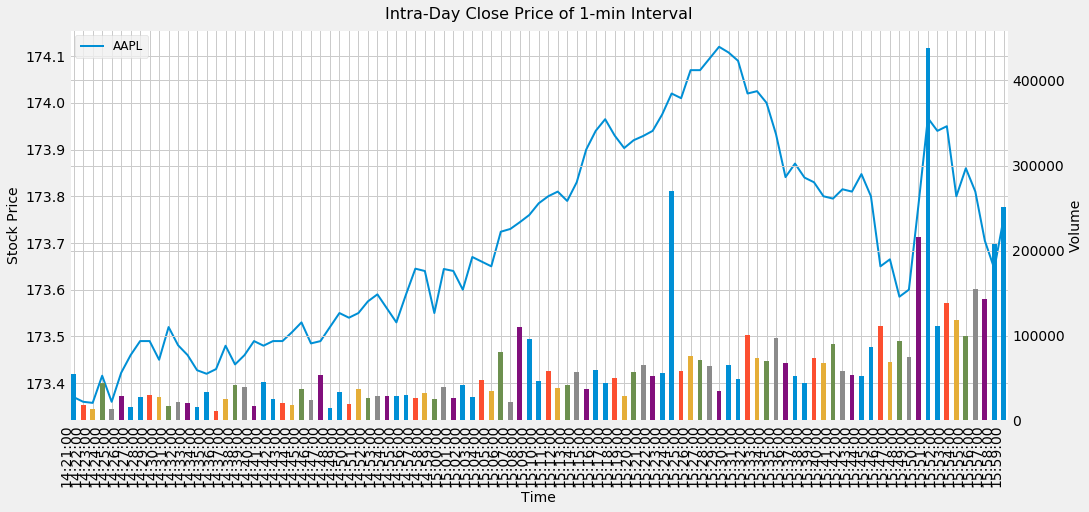

In [3]:
# import libraries
%matplotlib inline
import requests
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# get user input and url
# symbol="AAPL"
symbol=raw_input("Please provide a valid stock symbol, like AAPL,AMZN: ").upper()
api_key="YMKEPIY3AWI2CV5G"
interval="1min" # 1min, 5min, 15min, 30min, 60min
url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol="+symbol+"&interval="+interval+"&apikey="+api_key 
# +"datatype=csv"

# returns intraday time series
# The intraday time series typically spans the last 10 to 15 trading days. 
response = requests.get(url)
data_json = response.json()
# result_df = json_normalize(data['Time Series (1min)']).T
col = 'Time Series ('+interval+')'
df = pd.DataFrame(data_json[col]).T
df = df[:-1]
df[symbol] = df['4. close'].astype(float)
df['volume'] = df['5. volume'].astype(int)
df.index = [i.split()[1] for i in list(df.index)]
# intraday time series plot
fig, ax = plt.subplots(figsize=(15, 8))
ax = df[symbol].plot(ax=ax,linewidth=2)
ax.set_facecolor('white')
ax2 = ax.twinx()
ax2 = df['volume'].plot(kind="bar")
ax.legend(loc="upper left", fontsize=12)
ax.set_xlabel("Time", size=14)
ax.set_ylabel('Stock Price', size=14)
ax2.set_ylabel('Volume', size=14)
plt.title("Intra-Day Close Price of 1-min Interval",  y=1.01, size=16)
fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
df[df.columns[0:5]].tail()

### 2. Execute below cell to see the price forecast for the next 5 days.

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Stock Price For The Next 5 Days: 
predicted for t=1 is 174.359075
predicted for t=2 is 174.611126
predicted for t=3 is 174.849381
predicted for t=4 is 175.086246
predicted for t=5 is 175.322970


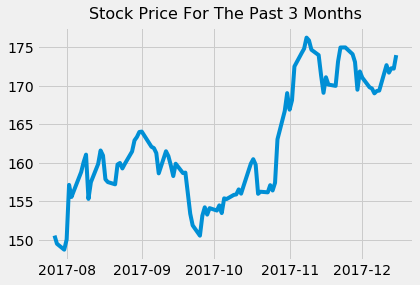

In [5]:
# daily series - covering up to 20 years of historical data (2000); if not full size, then last 6 months
# url2 = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+symbol+"&outputsize=full&apikey="+api_key
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# load daily time series
url2 = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+symbol+"&apikey="+api_key
response2 = requests.get(url2)
data2_json = response2.json()
df2 = pd.DataFrame(data2_json['Time Series (Daily)']).T
df2.index = [datetime.strptime(i, "%Y-%m-%d") for i in list(df2.index)]
ts = df2['4. close'].astype(float)

# find the order for ARMA model
res = arma_order_select_ic(ts, ic=['aic', 'bic'])
p = res.bic_min_order[0]
q = res.bic_min_order[1]

# fit ARIMA model and forecast
predictions = list()
ts2 = [x for x in ts]
print("Stock Price For The Next 5 Days: ")
for t in range(5):
    model = ARIMA(ts2, order=(p, 1, q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    ts2.append(yhat)
    print('predicted for t=%s is %f' % (t+1, yhat))

# plot
pyplot.plot(ts)
plt.title("Stock Price For The Past 3 Months",  y=1.01, size=16)
# how to add the prediction to the original series?
# pyplot.plot(predictions, color='red')
pyplot.show()